In [101]:
import numpy as np
import pandas as pd

In [102]:
data = pd.read_csv("/content/data.csv")

In [103]:
data.shape

(11391, 3)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11391 entries, 0 to 11390
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    11391 non-null  int64 
 1   Unnamed: 0.1  11391 non-null  int64 
 2   0             11241 non-null  object
dtypes: int64(2), object(1)
memory usage: 267.1+ KB


In [105]:
data.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace =True)

In [106]:
data.rename(columns={'0':"Comments"}, inplace=True)

In [107]:
data.head()

,Comments
0,Doctor Strange is easily Marvel's most powerfu...
1,"The lyrics really fits Doctor Strange\n\n""I wa..."
2,Some songs never gets old
3,This song never gets old. No matter how much I...
4,2008 : we got a legend\n2016 : we got another ...


In [108]:
data.isnull().values.any()

True

In [109]:
data = data.dropna(how='any', axis=0)

In [110]:
data = data.drop_duplicates()

In [111]:
data.shape

(11009, 1)

In [112]:
data= data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [113]:
data["Comments"] = data["Comments"].str.lower()

In [114]:
data["Comments"] = data["Comments"].str.replace('\n','')
data["Comments"] = data["Comments"].str.replace('\t', ' ')

In [115]:
data["Comments"] = data["Comments"].str.replace(' {2,}', ' ', regex=True)
data["Comments"] = data["Comments"].str.strip()

In [116]:
!pip install langdetect
from langdetect import detect

In [117]:

data["language"] = 0
for i in range(0,len(data["Comments"])):
  temp = data["Comments"].iloc[i]
  try:
    data["language"].iloc[i] = detect(temp)
  except:
    data["language"].iloc[i] = "can't detect"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [118]:
data.shape

(11009, 2)

In [119]:
data = data.loc[data["language"] == "en"]

In [120]:
data.shape

(9123, 2)

In [121]:
data.drop(columns=["language"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
data.head()

,Comments
0,doctor strange is easily marvel's most powerfu...
1,"the lyrics really fits doctor strange""i was br..."
3,this song never gets old. no matter how much i...
4,2008 : we got a legend2016 : we got another le...
5,0:53 the scene and music are in sync...the bea...


In [123]:
data["Comments"] = data["Comments"].replace(r'www\S+', '', regex=True)
data["Comments"] = data["Comments"].replace(r'http\S+', '', regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
#only to keep alphabets
data["Comments"] = data["Comments"].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [125]:
data.head()

,Comments
0,doctor strange is easily marvel s most powerfu...
1,the lyrics really fits doctor strange i was br...
3,this song never gets old no matter how much i...
4,we got a legend we got another le...
5,the scene and music are in sync the bea...


In [126]:
data["Comments"] = data["Comments"].str.replace('\n','')
data["Comments"] = data["Comments"].str.replace('\t', ' ')
#removes two or more spaces
data["Comments"] = data["Comments"].str.replace(' {2,}', ' ', regex=True)
data["Comments"] = data["Comments"].str.strip()

In [127]:
from textblob import TextBlob

In [128]:
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
data["polarity"] = data["Comments"].apply(getPolarity)

In [129]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
data["subjectivity"] = data["Comments"].apply(getSubjectivity)

In [130]:
data["category"] = 0
data["category"][data["polarity"] > 0] = 1
data["category"][data["polarity"] <= 0] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
data.head()

,Comments,polarity,subjectivity,category
0,doctor strange is easily marvel s most powerfu...,0.436667,0.556667,1
1,the lyrics really fits doctor strange i was br...,-0.050000,0.190000,-1
3,this song never gets old no matter how much i ...,0.325000,0.475000,1
4,we got a legend we got another legendboth were...,0.000000,0.000000,-1
5,the scene and music are in sync the beat match...,1.000000,1.000000,1


In [132]:
data["category"].value_counts()

 1    5064
-1    4059
Name: category, dtype: int64

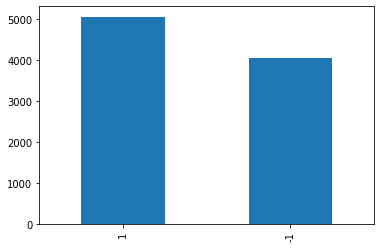

In [133]:
data["category"].value_counts().plot.bar()

In [134]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import re

In [137]:
stop_words = stopwords.words("english")

In [138]:
def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  updated_sen = [word for word in word_tokens if not word in stop_words]
  return " ".join(updated_sen)


In [139]:
data["Comments"] = data["Comments"].apply(lambda x : remove_stopwords(x))

In [140]:
data.head()

,Comments,polarity,subjectivity,category
0,doctor strange easily marvel powerful best hero,0.436667,0.556667,1
1,lyrics really fits doctor strange broken accid...,-0.050000,0.190000,-1
3,song never gets old matter much listen legenda...,0.325000,0.475000,1
4,got legend got another legendboth sherlock hol...,0.000000,0.000000,-1
5,scene music sync beat matches perfectly,1.000000,1.000000,1


In [141]:
from sklearn.feature_extraction.text import CountVectorizer

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test = train_test_split(data["Comments"],data["category"],test_size = 0.2,random_state = 42)

##Model Building

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect_train = vect.fit_transform(x_train)
vect_test = vect.transform(x_test)

In [145]:
vect.vocabulary_

{'awesome': 692,
 'god': 4028,
 'bless': 995,
 'judge': 5268,
 'caprio': 1326,
 'nice': 6464,
 'like': 5614,
 'big': 937,
 'heart': 4377,
 'wish': 10557,
 'could': 2026,
 'blame': 985,
 'mistakes': 6168,
 'others': 6739,
 'get': 3968,
 'away': 689,
 'great': 4135,
 'bs': 1180,
 'story': 9055,
 'india': 4859,
 'language': 5451,
 'better': 919,
 'make': 5832,
 'sure': 9261,
 'speak': 8853,
 'coming': 1708,
 'recipe': 7757,
 'success': 9180,
 'future': 3864,
 'paying': 6929,
 'attention': 621,
 'topics': 9713,
 'ted': 9454,
 'talk': 9388,
 'chooses': 1524,
 'highlight': 4453,
 'happens': 4293,
 'every': 3223,
 'time': 9653,
 'obviously': 6585,
 'racist': 7642,
 'dame': 2237,
 'shame': 8499,
 'people': 6962,
 'sick': 8593,
 'expect': 3295,
 'follow': 3673,
 'laws': 5493,
 'broke': 1158,
 'america': 310,
 'official': 6621,
 'speaking': 8856,
 'english': 3077,
 'excuse': 3271,
 'crack': 2069,
 'someone': 8789,
 'neck': 6404,
 'pretty': 7351,
 'called': 1280,
 'xenophobia': 10668,
 'honour': 

In [146]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(vect_train,y_train)

LogisticRegression()

In [147]:
model.score(vect_train,y_train)

0.9727322554124418

In [148]:
model.score(vect_test,y_test)

0.8805479452054794

In [149]:
from sklearn import metrics
print(metrics.classification_report(y_test, model.predict(vect_test)))

              precision    recall  f1-score   support

          -1       0.83      0.91      0.87       803
           1       0.92      0.86      0.89      1022

    accuracy                           0.88      1825
   macro avg       0.88      0.88      0.88      1825
weighted avg       0.88      0.88      0.88      1825

